# Python Assignment - Working With Events

In this question, you are given 4 text files. 
These files contain timestamps, which correspond to the times of some 'events'. 

Your first task is to find out how many events are present in each file.

Consider only those events which have a positive value for timestamp


In [80]:
#your code here
import matplotlib.pyplot as plt
%matplotlib inline  
count = []
data = []
for i in range(1,5):
   
    f = open(f"event_Q{i}.txt", "r")
    list1 = f.read().split(", ")
    list2 = []
    for k in list1:
        if float(k)>0:
            list2.append(float(k))

    data.append(list2)

for i in range(1,5):
    print(len(data[i-1]))


6528
7800
7858
5193


After this, for each file, make a plot of events per second in that file.
You dont have to find the average rate, instead for each second 0-1, 1-2, 2-3, .. 54-55, find the number of events in each second and plot it with respect to time.

Plot these 4 separately, as well as in a single overlapping plot.
Make sure to give proper titles, labels and legends.

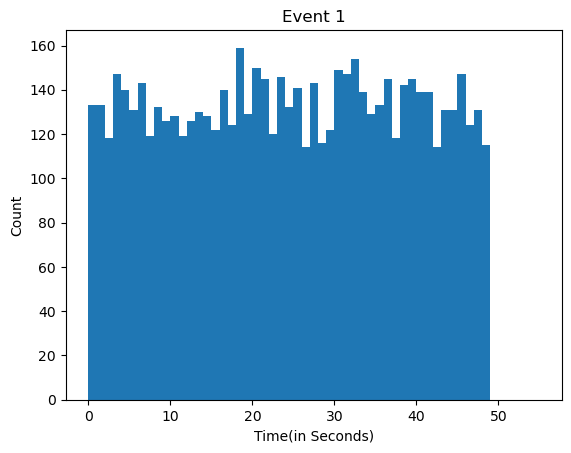

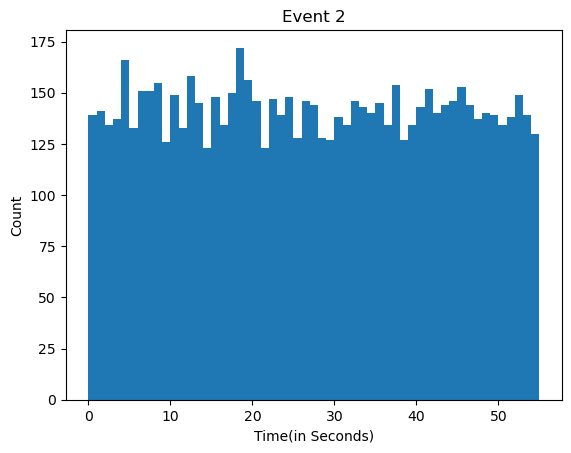

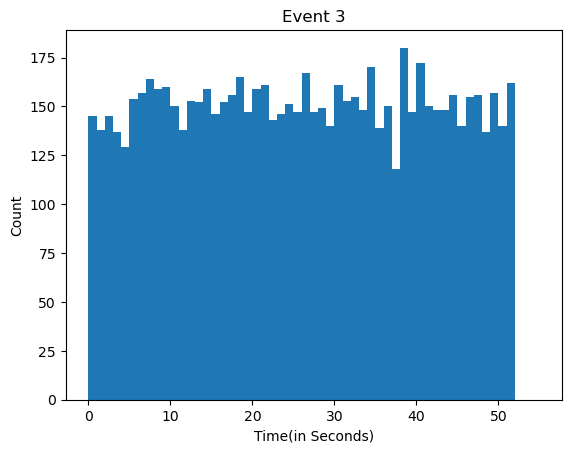

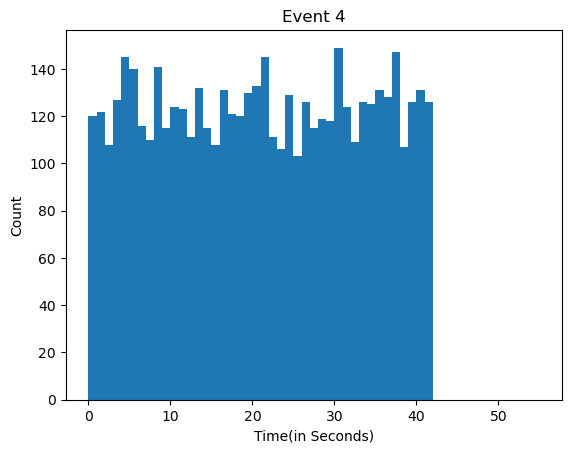

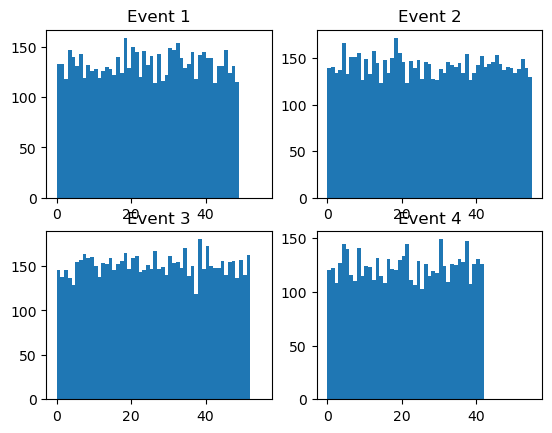

In [81]:
#your code here

for i in range(4):
    fig1 = plt.figure()
    plt.hist(data[i], bins=55, range = (0,55) )
    plt.title(f"Event {i+1}")
    plt.xlabel("Time(in Seconds)")
    plt.ylabel("Count")
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.hist(data[0], bins=55, range = (0,55) )
ax1.set_title("Event 1")
ax2.hist(data[1], bins=55, range = (0,55) )
ax2.set_title("Event 2")
ax3.hist(data[2], bins=55, range = (0,55) )
ax3.set_title("Event 3")
ax4.hist(data[3], bins=55, range = (0,55) )
ax4.set_title("Event 4")


plt.show()

Give your insights on what you observe in the various plots. Regarding frequency of events in various files as well as the total duration each file is covering.

The total duration that each file covers decreases in the order Event 2 > 3 > 1 > 4
We also see that the peaks and troughs in all the files are somewhat correlated i.e. if there are less number of events in one file at a particular bin, they are less in all of the files. 

Now for the final part of this question. We can see that the event frequency varies with time. Count how many bins are there, where atleast 2 of the files have more than 140 events in that bin, simultaneously.

In [82]:
#your code here
hist = []
for i in range(4): 
    hist.append(np.histogram(data[i], bins = 55, range = (0,55), density = False)[0])
hist = np.array(hist)
bins = []

for i in range(55):
    counter = 0
    for k in hist[: , i]:
        if( k > 140) :
            counter+=1
    if(counter >= 2):
        bins.append(i)
print(len(bins))

33


## Bonus

Let us do this more generally Generate a table with the threshold along one axis and the number of files along the other axis. Fill the table with counts of bins where atleast num_files have more than threshold events in that bin. In the previous part, num_files was 2 and num_bins was 140. Do this for num_files in [1,2,3,4]. num_bins in [130,135,140,145,150,155,160]. Print the table.

In [83]:
#your code here
from tabulate import tabulate
num_files = [1,2,3,4]
num_bins = [130,135,140,145,150,155,160]
bins_table = []

for a in num_files:
    bins_list = []
    bins_list.append(f"Num_files = {a}")
    for b in num_bins:
        hist = []
        for i in range(4): 
            hist.append(np.histogram(data[i], bins = 55, range = (0,55), density = False)[0])
        hist = np.array(hist)
        bins = []

        for i in range(55):
            counter = 0
            for k in hist[: , i]:
                if( k > b) :
                    counter+=1
            if(counter >= a):
                bins.append(i)
        bins_list.append(len(bins))
    bins_table.append(bins_list)

print(tabulate(bins_table, headers = num_bins))

                 130    135    140    145    150    155    160
-------------  -----  -----  -----  -----  -----  -----  -----
Num_files = 1     54     54     49     45     31     21     10
Num_files = 2     48     45     33     20      6      1      1
Num_files = 3     28     15      8      4      1      1      0
Num_files = 4      7      1      0      0      0      0      0
